In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\titanic_dataset.csv")

In [64]:
data.set_index('PassengerId', inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [66]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [69]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
from sklearn.impute import SimpleImputer

In [71]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [72]:
numeric_imputer = SimpleImputer(strategy='median')
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])


In [73]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

In [74]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

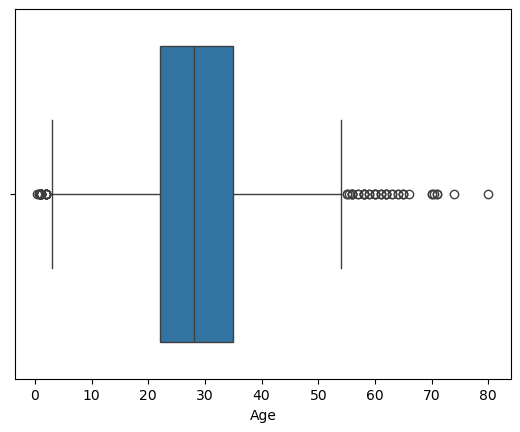

In [75]:
sns.boxplot(x=data['Age'])
plt.show()

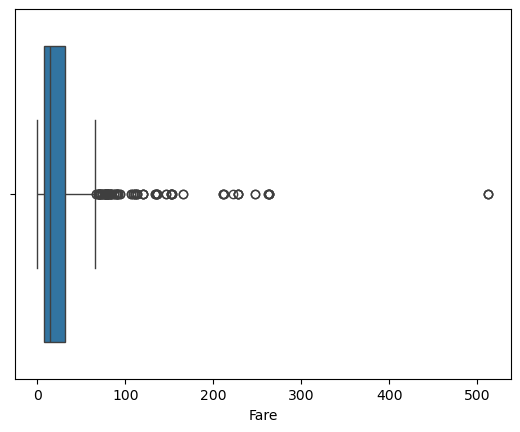

In [92]:
sns.boxplot(x=data['Fare'])
plt.show()

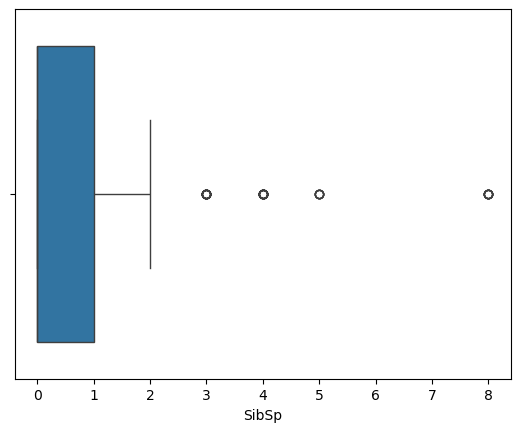

In [94]:
sns.boxplot(x=data['SibSp'])
plt.show()

In [96]:
for col in ['Age', 'Fare', 'SibSp']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower_bound, upper_bound)

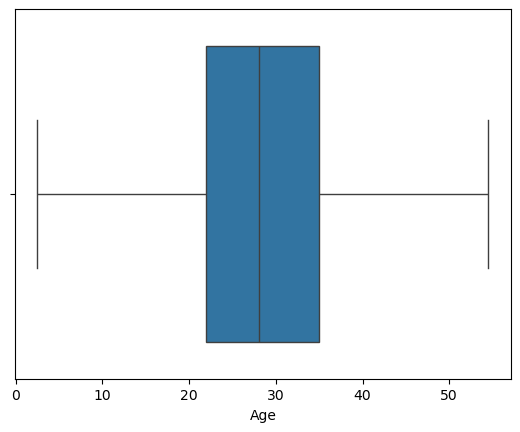

In [98]:
sns.boxplot(x=data['Age'])
plt.show()

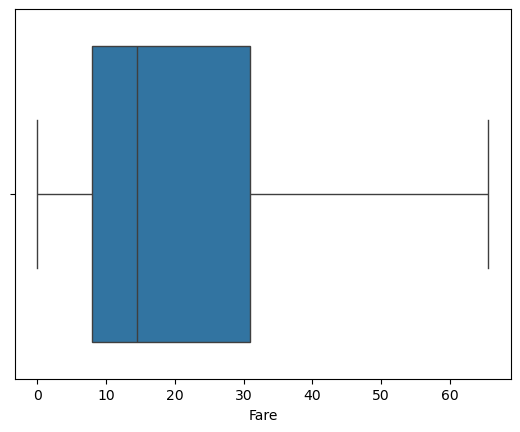

In [100]:
sns.boxplot(x=data['Fare'])
plt.show()

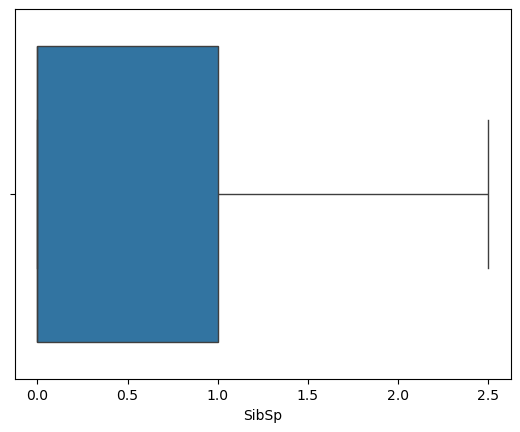

In [102]:
sns.boxplot(x=data['SibSp'])
plt.show()

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()

In [114]:
X = data.drop(columns=['Survived'])
y = data['Survived']
numeric_cols = numeric_cols.drop('Survived')

In [116]:
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

In [120]:
X_scaled = pd.concat([X_scaled, data[categorical_cols].reset_index(drop=True)], axis=1)


In [122]:
X_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.375000,0.4,0.0,0.110460,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,0.0,0.682692,0.4,0.0,1.000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1.0,0.451923,0.0,0.0,0.120745,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,0.0,0.625000,0.4,0.0,0.809027,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,1.0,0.625000,0.0,0.0,0.122649,"Allen, Mr. William Henry",male,373450,B96 B98,S
